In [1]:
from astropy.io import fits
import numpy as np

In [2]:
hdu = fits.open('ktwo200008664-c05_0000.fits')

In [3]:
image = hdu[1].data['FLUX']

In [4]:
image = image.reshape((50,50))
image -= np.median(image)

In [5]:
image.shape

(50, 50)

In [6]:
import matplotlib.pyplot as plt

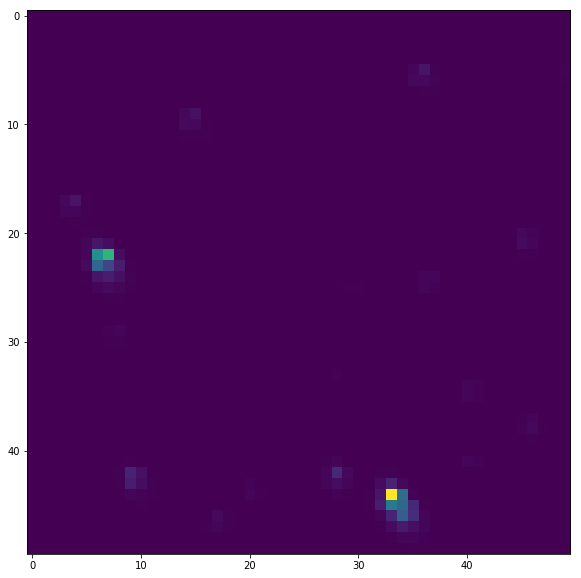

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [8]:
from photutils import DAOStarFinder

In [9]:
from astropy.stats import mad_std
bkg_sigma = mad_std(image) 

#### Use [DAOStarFInder](https://photutils.readthedocs.io/en/stable/api/photutils.detection.DAOStarFinder.html#photutils.detection.DAOStarFinder) to find targets:

In [60]:
daofind = DAOStarFinder(fwhm=5., threshold=3.*bkg_sigma, roundhi=5., ratio=.85) 

In [61]:
sources = daofind(image)

In [62]:
for col in sources.colnames:
    sources[col].info.format = '%.8g'  # for consistent table output

In [63]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,14.667946,9.4432829,0.4623483,0.32338175,0.20408644,35,0,1100.1794,98.362435,-4.9820732
2,6.826302,11.369304,0.45855353,0.99730453,0.44457133,35,0,19.480103,2.0186783,-0.76266779
3,32.256193,15.364518,0.83330881,0.13191768,0.23098859,35,0,28.397652,1.7774767,-0.62450977
4,29.483259,25.127217,0.95796385,0.11589172,-0.18295883,35,0,345.69998,17.529917,-3.1094496
5,36.471663,24.526011,0.46056679,0.34548785,0.10185555,35,0,419.98822,37.52669,-3.9358506
6,14.188342,34.875456,0.91011008,0.30254166,0.69550828,35,0,41.700958,2.2746153,-0.89226991
7,40.400214,34.693744,0.95777024,-0.1327662,0.060085656,35,0,782.93842,39.129749,-3.9812677
8,45.83445,37.795057,0.96472736,0.11166146,-0.020988261,35,0,1186.2819,58.301759,-4.4142041
9,9.2731125,42.507552,0.86934885,0.059134145,0.21965289,35,0,4287.0513,233.09471,-5.918831


In [64]:
from photutils import aperture_photometry, CircularAperture

positions = (sources['xcentroid'], sources['ycentroid'])    
apertures = CircularAperture(positions, r=4.)    
phot_table = aperture_photometry(image, apertures)    
# for col in phot_table.colnames:
#     phot_table[col].info.format = '%.8g'  # for consistent table output
# phot_table  

plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=1.5, alpha=0.5)